<a href="https://colab.research.google.com/github/uvais-6/Generative-AI/blob/main/DCGAN_celeb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy matplotlib opencv-python kaggle

In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset


Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 99% 1.31G/1.33G [00:06<00:00, 247MB/s]
100% 1.33G/1.33G [00:07<00:00, 203MB/s]


In [ ]:
!unzip celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers

# **Change this path** to the directory where you extracted the CelebA dataset images.
# You likely downloaded it to the current directory, so './img_align_celeba' would work
data_dir = './img_align_celeba'

# List all files in the directory
image_files = os.listdir(data_dir)

# Preprocessing function: Resize and normalize images
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(64, 64))  # Resize image to 64x64
    image = img_to_array(image)  # Convert image to numpy array
    image = (image / 127.5) - 1  # Normalize the image to range [-1, 1]
    return image

# Load and preprocess the images
# Filter out directories and only process image files
images = [preprocess_image(os.path.join(data_dir, img)) for img in image_files
          if os.path.isfile(os.path.join(data_dir, img))]
images = np.array(images)

# Batch size and image shape
batch_size = 128
img_shape = (64, 64, 3)

In [ ]:
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(8 * 8 * 256, input_dim=latent_dim),
        layers.Reshape((8, 8, 256)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh')
    ])
    return model


In [ ]:
def build_discriminator(img_shape):
    model = tf.keras.Sequential([
        layers.Conv2D(32, kernel_size=4, strides=2, padding='same', input_shape=img_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(256, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator while training GAN
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = tf.keras.Model(gan_input, gan_output)
    return gan


In [ ]:
# Latent dimension for the generator
latent_dim = 100

# Build models
generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)
gan = build_gan(generator, discriminator)

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the GAN model
gan.compile(optimizer='adam', loss='binary_crossentropy')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_10" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(None, 32, 32, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=False, name=keras_tensor_142>',)
  • kwargs={'mask': 'None'}

In [ ]:
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(8 * 8 * 256, input_dim=latent_dim),
        layers.Reshape((8, 8, 256)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        # The next line caused the output shape to be (128, 128, 3)
        # layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding='same'),
        # Change strides to 1 to output (64, 64, 3)
        layers.Conv2DTranspose(32, kernel_size=4, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        # The next line caused the output shape to be (128, 128, 3)
        # layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh')
        # Change strides to 1 to output (64, 64, 3)
        layers.Conv2DTranspose(3, kernel_size=4, strides=1, padding='same', activation='tanh')
    ])
    return model

In [ ]:
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(8 * 8 * 256, input_dim=latent_dim),
        layers.Reshape((8, 8, 256)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        # The next line caused the output shape to be (128, 128, 3)
        # layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding='same'),
        # Change strides to 1 to output (64, 64, 3)
        layers.Conv2DTranspose(32, kernel_size=4, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        # The next line caused the output shape to be (128, 128, 3)
        # layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh')
        # Change strides to 1 to output (64, 64, 3)
        layers.Conv2DTranspose(3, kernel_size=4, strides=1, padding='same', activation='tanh')
    ])
    return model

In [ ]:
import time

def train_gan(epochs, batch_size=128):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        start_time = time.time()

        # Get real images
        real_images = images[np.random.randint(0, images.shape[0], half_batch)]
        real_labels = np.ones((half_batch, 1))

        # Generate fake images
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator (via the GAN model)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        print(f"{epoch + 1}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")
        print(f"Time taken for epoch {epoch + 1}: {time.time() - start_time} seconds")

        # Save generated images at intervals
        if epoch % 100 == 0:
            save_generated_images(epoch)

def save_generated_images(epoch):
    noise = np.random.normal(0, 1, (16, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    fig, axs = plt.subplots(4, 4, figsize=(4, 4))
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(generated_images[cnt])
            axs[i, j].axis('off')
            cnt += 1
    plt.tight_layout()
    plt.savefig(f"generated_images_epoch_{epoch}.png")
    plt.close()

# Train the GAN
train_gan(epochs=10000, batch_size=128)


ValueError: high <= 0

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers

# **Change this path** to the directory where you extracted the CelebA dataset images.
# You likely downloaded it to the current directory, so './img_align_celeba' would work
# **Make sure the path is correct**
data_dir = './img_align_celeba'

# List all files in the directory
image_files = os.listdir(data_dir)

# Preprocessing function: Resize and normalize images
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(64, 64))  # Resize image to 64x64
    image = img_to_array(image)  # Convert image to numpy array
    image = (image / 127.5) - 1  # Normalize the image to range [-1, 1]
    return image

# Load and preprocess the images
# Filter out directories and only process image files
images = [preprocess_image(os.path.join(data_dir, img)) for img in image_files
          if os.path.isfile(os.path.join(data_dir, img))]
images = np.array(images)

# Print the shape of the images array to check if it's populated
print("Shape of images array:", images.shape) # This will print (num_images, 64, 64, 3) if loaded correctly

# Batch size and image shape
batch_size = 128
img_shape = (64, 64, 3)

Shape of images array: (0,)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from tqdm import tqdm
import torchvision.datasets as datasets
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torchvision.utils as vutils
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import Subset
import numpy as np

In [ ]:
!pip install torch torchvision
!conda install torch torchvision

/bin/bash: line 1: conda: command not found


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
LEARNING_RATE = 2e-4  # could also use two lrs, one for gen and one for disc
BATCH_SIZE = 128
IMAGE_SIZE = 64
CHANNELS_IMG = 3
Z_DIM = 100
NUM_EPOCHS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64

In [ ]:
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder('/content/celeba-dataset.zip', transform=transform)
dataloader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)

NotADirectoryError: [Errno 20] Not a directory: '/content/celeba-dataset.zip'

In [ ]:
import zipfile

# ... (your existing code) ...

# Extract the zip file to a temporary directory
with zipfile.ZipFile('/content/celeba-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/celeba-dataset')

# Now use the extracted directory as the root for ImageFolder
dataset = datasets.ImageFolder('/content/celeba-dataset/img_align_celeba', transform=transform)

# ... (rest of your code) ...

In [ ]:
dataloader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)

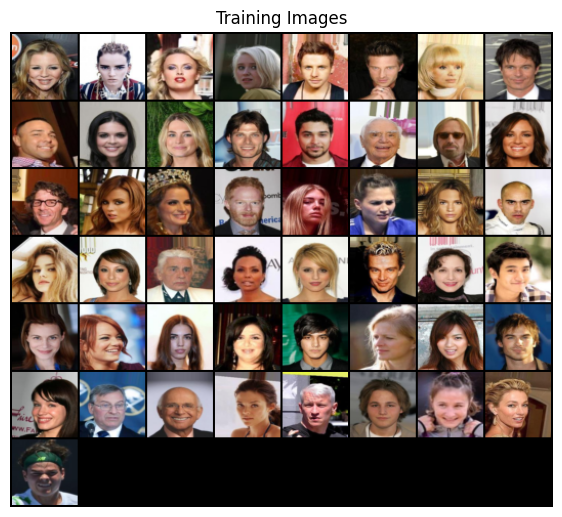

In [ ]:
real_batch = next(iter(dataloader))
plt.figure(figsize=(7,7))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:49], padding=2, normalize=True).cpu(),(1,2,0)))

In [ ]:
class Generator(nn.Module):
    def __init__(self, z_dim, channels_img, features_g):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            self._block(z_dim, features_g * 16, 4, 1, 0),
            self._block(features_g * 16, features_g * 8, 4, 2, 1),
            self._block(features_g * 8, features_g * 4, 4, 2, 1),
            self._block(features_g * 4, features_g * 2, 4, 2, 1),
            nn.ConvTranspose2d(
                features_g * 2, channels_img, kernel_size=4, stride=2, padding=1
            ),
            nn.Tanh()
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False
            ),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, channels_img, features_d):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Conv2d(channels_img, features_d, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            self._block(features_d, features_d * 2, 4, 2, 1),
            self._block(features_d * 2, features_d * 4, 4, 2, 1),
            self._block(features_d * 4, features_d * 8, 4, 2, 1),
            nn.Conv2d(features_d * 8, 1, kernel_size=4, stride=2, padding=0),
            nn.Sigmoid()
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.Conv2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False
            ),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2)
        )

    def forward(self, x):
        return self.disc(x)

In [ ]:
def initialize_weights(model):
    classname = model.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(model.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(model.weight.data, 1.0, 0.02)
        nn.init.constant_(model.bias.data, 0)

In [ ]:
gen = Generator(Z_DIM, CHANNELS_IMG, FEATURES_GEN).to(device)
disc = Discriminator(CHANNELS_IMG, FEATURES_DISC).to(device)

initialize_weights(gen)
initialize_weights(disc)

In [ ]:
opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
opt_disc = optim.Adam(disc.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
criterion = nn.BCELoss()

fixed_noise = torch.randn(32, Z_DIM, 1, 1).to(device)

In [ ]:
def show_tensor_images(image_tensor, num_images=32, size=(1, 64, 64)):
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=4)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

Epoch [0/5] Batch 0/1583                   Loss D: 0.6929, loss G: 2.4854


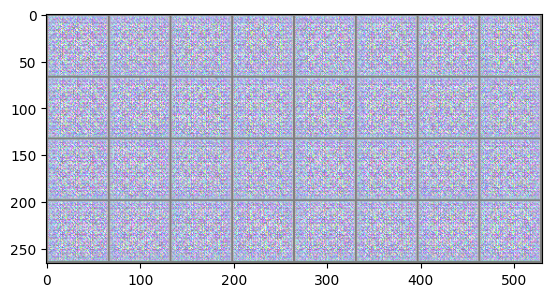

Epoch [0/5] Batch 50/1583                   Loss D: 0.1840, loss G: 14.8943


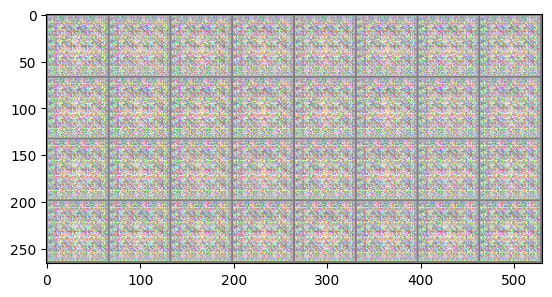

Epoch [0/5] Batch 100/1583                   Loss D: 0.7990, loss G: 1.3682


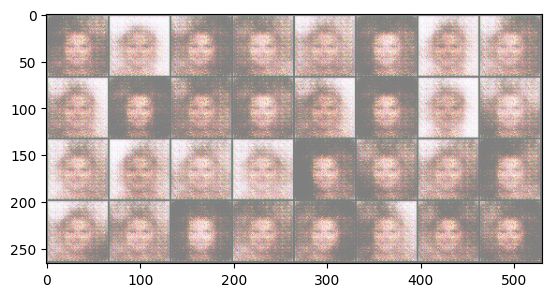

Epoch [0/5] Batch 150/1583                   Loss D: 0.3434, loss G: 2.6251


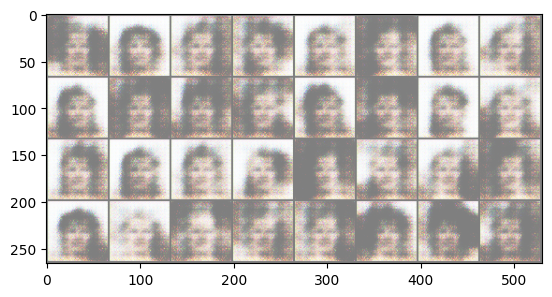

Epoch [0/5] Batch 200/1583                   Loss D: 0.6863, loss G: 1.7772


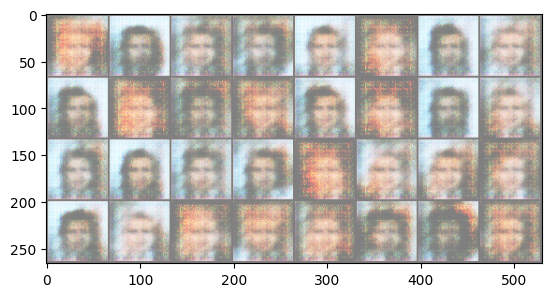

Epoch [0/5] Batch 250/1583                   Loss D: 0.3563, loss G: 2.9369


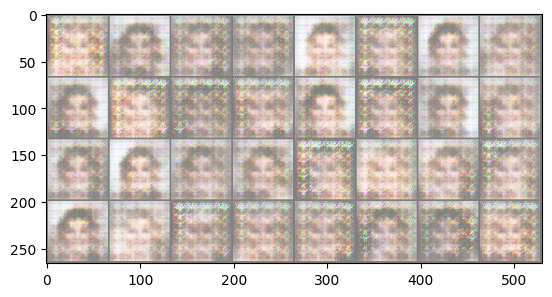

In [ ]:
gen.train()
disc.train()

for epoch in range(NUM_EPOCHS):
    for batch_idx, (real, _ ) in enumerate(dataloader):
        real = real.to(device)
        ### create noise tensor
        noise = torch.randn((BATCH_SIZE, Z_DIM, 1, 1)).to(device)
        fake = gen(noise)

        ### Train Discriminator: max log(D(x)) + log(1 - D(G(z)))
        disc_real = disc(real).reshape(-1)
        loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake.detach()).reshape(-1)
        loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        loss_disc = (loss_disc_real + loss_disc_fake) / 2
        disc.zero_grad()
        loss_disc.backward()
        opt_disc.step()

        ### Train Generator: min log(1 - D(G(z))) <-> max log(D(G(z))
        output = disc(fake).reshape(-1)
        loss_gen = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()

        ### Print losses occasionally and fake images occasionally
        if batch_idx % 50 == 0:
            print(
                f"Epoch [{epoch}/{NUM_EPOCHS}] Batch {batch_idx}/{len(dataloader)} \
                  Loss D: {loss_disc:.4f}, loss G: {loss_gen:.4f}"
            )
            with torch.no_grad():
                fake = gen(fixed_noise)
                img_grid_real = torchvision.utils.make_grid(real[:32], normalize=True)
                img_grid_fake = torchvision.utils.make_grid(fake[:32], normalize=True)
                show_tensor_images(img_grid_fake)